# Dimension reduction and features extraction


## Introduction

In machine learning and statistics, dimensionality reduction or dimension reduction is the process of reducing the number of features under consideration, and can be divided into feature selection (not adressed here) and feature extraction.

Feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

The input matrix $\mathbf{X}$, of dimension $N \times P$, is
$$
\begin{bmatrix}
x_{11} & \ldots     &     x_{1P}\\
       &            &      \\
\vdots & \mathbf{X} & \vdots\\
       &            &      \\
x_{N1} & \ldots     &     x_{NP},
\end{bmatrix}
$$
where the rows represent the samples and columns represent the variables.

The goal is to learn a transformation that extracts a few relevant features. This is generally done by exploiting the covariance $\mathbf{\Sigma_{XX}}$ between the input features.

## Singular value decomposition (SVD)

### Principles
 
- SVD is a method for transforming correlated variables into a set of uncorrelated ones that better expose the various relationships among the original data items.
- At the same time, SVD is a method for identifying and ordering the dimensions along which data points exhibit the most variation.
- Singular value decomposition is the key part of principal components analysis.

### Matrix factorization

The SVD of an $N \times P$ matrix, $\mathbf{X}$, decomposes the matrix into three simple transformations
$$
\mathbf{X} = \mathbf{U}\mathbf{D}\mathbf{V}^{T},
$$
where
$$
\begin{bmatrix}
x_{11} &            & x_{1P}\\
       &            &       \\
       & \mathbf{X} &       \\
       &            &       \\
x_{N1} &            & x_{NP}
\end{bmatrix} = 
\begin{bmatrix}
u_{11} &            & u_{1K}\\
       &            &       \\
       & \mathbf{U} &       \\
       &            &       \\
u_{N1} &            & u_{NK}
\end{bmatrix}
\begin{bmatrix}
d_{1}&            & 0\\
     & \mathbf{D} &\\
 0   &            & d_{K}
\end{bmatrix}
\begin{bmatrix}
v_{11}&              & v_{1P}\\
      & \mathbf{V}^T &       \\
v_{K1}&              & v_{KP}
\end{bmatrix}.
$$

The **right-singular vectors**

- $\mathbf{V} = [\mathbf{v}_1,\cdots , \mathbf{v}_K]$ is a $P \times K$ orthogonal matrix.

- $\mathbf{V}$ perfoms the initial rotations along the $K=\min(N, P)$ **principal component directions**.

- Each $\mathbf{v}_j$ performs the linear combination of the variables that has maximum sample variance, subject to being uncorrelated with the previous $\mathbf{v}_{j-1}$.

- $\mathbf{V}$ is an orthogonal matrix form an orthonormal basis for the space spanned by the row vectors of $\mathbf{X}$. They are the orthonormal eigenvectors of $\mathbf{X}^T\mathbf{X}$.

The **singular values**

- $\mathbf{D}$ is a $K \times K$ diagonal matrix made of the singular values of $\mathbf{X}$ with $d_1 \geq d_2 \geq \cdots \geq d_K \geq 0$.

- $\mathbf{D}$ scale the projection along the coordinate axes by $d_1, d_2, \cdots, d_K$.

- Singular values are the square roots of the eigenvalues of $\mathbf{X}^{T}\mathbf{X}$.

The **left-singular vectors** 

- $\mathbf{U} = [\mathbf{u}_1, \cdots , \mathbf{u}_K]$ is an $N \times K$ orthogonal matrix.

- It may be understood as the coordinates on the new orthogonal basis (obtained after the initial rotation) called **principal components** in the PCA. 

- $\mathbf{U}$ form an orthonormal basis for the space spanned by the column vectors of $\mathbf{X}$.

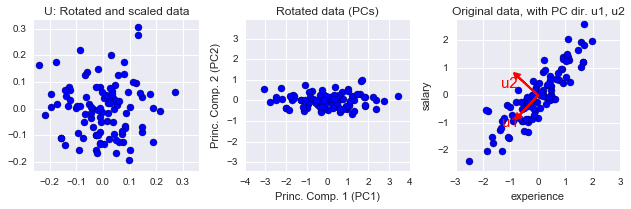

In [42]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)
 
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA using SVD
X -= X.mean(axis=0)  # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)
# U : Unitary matrix having left singular vectors as columns.
#     Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
#     full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,), 
#     with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows. 
#     Of shape (n_features, n_features) or (n_comps, n_features) depending 
# on full_matrices.

plt.figure(figsize=(9, 3)) 

plt.subplot(131)
plt.scatter(U[:, 0], U[:, 1], s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")

plt.subplot(132)

# Project data
PC = np.dot(X, Vh.T)
plt.scatter(PC[:, 0], PC[:, 1], s=50)
plt.axis('equal')
plt.title("Rotated data (PCs)")
plt.xlabel("Princ. Comp. 1 (PC1)")
plt.ylabel("Princ. Comp. 2 (PC2)")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, 
              head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'u%i' % (i+1), color="r", fontsize=15,
             horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)

plt.title("Original data, with PC dir. u1, u2")
plt.xlabel("experience")
plt.ylabel("salary")
           
plt.tight_layout()

## Principal components analysis (PCA)

Sources:

- C. M. Bishop *Pattern Recognition and Machine Learning*, Springer, 2006

- [Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

- [Principal Component Analysis in 3 Simple Steps](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)


### Principles

- Principal components analysis is the main method used for linear dimension reduction.

- The idea of principal component analysis is to find the $K$ **principal components directions** (called the **loadings**) $\mathbf{V}_{K\times P}$ that capture the variation in the data as much as possible.

- It converts a set of $N$ $P$-dimensionnal observations $\mathbf{N}_{N\times P}$ of possibly correlated variables into a set of $N$ $K$-dimensionnal samples  $\mathbf{C}_{N\times K}$, where the $K < P$. The new variables are linearly uncorrelated. The columns of $\mathbf{C}_{N\times K}$ are called the **principal components**.

- The dimension reduction is obtained by using only $K < P$ components that exploit correlation (covariance) among the original variables.

- PCA is mathematically defined as an orthogonal linear transformation $\mathbf{V}_{K\times P}$ that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
$$
\mathbf{C}_{N\times K} = \mathbf{X}_{N \times P} \mathbf{V}_{P \times K} 
$$

- PCA can be thought of as fitting a $P$-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipse is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

- Finding the $K$ largest axes of the ellipse will permit project the data onto a space having dimensionality $K < P$ while maximizing the variance of the projected data.

### Dataset preprocessing

#### Centering

Consider a data matrix, $\mathbf{X}$ , with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), ie. $\mathbf{X}$ is replaced by $\mathbf{X} - \mathbf{1}\bar{\mathbf{x}}^T$.

#### Standardizing

Optionally, standardize the columns, i.e., scale them by their standard-deviation. Without standardization, a variable with a high variance will capture most of the effect of the PCA. The principal direction will be aligned with this variable. Standardization will, however, raise noise variables to the save level as informative variables.

The covariance matrix of centered standardized data is the correlation matrix.

### Eigen decomposition of the data covariance matrix

To begin with, consider the projection onto a one-dimensional space ($K = 1$). We can define the direction of this space using a $P$-dimensional vector $\mathbf{v}$, which for convenience (and without loss of generality) we shall choose to be a unit vector so that $\|\mathbf{v}\|_2 = 1$ (note that we are only interested in the direction defined by $\mathbf{v}$, not in the magnitude of $\mathbf{v}$ itself). PCA consists of two mains steps:

**Projection in the directions that capture the greatest variance**

Each $P$-dimensional data point $\mathbf{x}_i$ is then projected onto $\mathbf{v}$, where the coordinate (in the coordinate system of $\mathbf{v}$) is a scalar value, namely $\mathbf{x}_i^T \mathbf{v}$. I.e., we want to find the vector $\mathbf{v}$ that maximizes these coordinates along $\mathbf{v}$, which we will see corresponds to maximizing the variance of the projected data. This is equivalently expressed as
$$
    \mathbf{v} = \arg \max_{\|\mathbf{v}\|=1}\frac{1}{N}\sum_i \left(\mathbf{x}_i^T \mathbf{v}\right)^2.
$$

We can write this in matrix form as
$$
    \mathbf{v} = \arg \max_{\|\mathbf{v}\|=1} \frac{1}{N} \|\mathbf{X} \mathbf{v}\|^2 = \frac{1}{N} \mathbf{v}^T \mathbf{X}^T \mathbf{X} \mathbf{v} = \mathbf{v}^T\mathbf{S_{XX}}\mathbf{v},
$$
where $\mathbf{S_{XX}}$ is a biased estiamte of the covariance matrix of the data, i.e.
$$
    \mathbf{S_{XX}} = \frac{1}{N} \mathbf{X}^T\mathbf{X}.
$$

We now maximize the projected variance $\mathbf{v}^T \mathbf{S_{XX}} \mathbf{v}$ with respect to $\mathbf{v}$. Clearly, this has to be a constrained maximization to prevent $\|\mathbf{v}_2\| \rightarrow \infty$. The appropriate constraint comes from the normalization condition $\|\mathbf{v}\|_2 \equiv \|\mathbf{v}\|_2^2 = \mathbf{v}^T \mathbf{v} = 1$. To enforce this constraint, we introduce a Lagrange multiplier that we shall denote by $\lambda$, and then make an unconstrained maximization of
$$
    \mathbf{v}^T\mathbf{S_{XX}} \mathbf{v} - \lambda (\mathbf{v}^T \mathbf{v} - 1).
$$

By setting the gradient with respect to $\mathbf{v}$ equal to zero, we see that this quantity has a stationary
point when
$$
    \mathbf{S_{XX}} \mathbf{v} = \lambda \mathbf{v}.
$$
We note that $\mathbf{v}$ is an eigenvector of $\mathbf{S_{XX}}$.

If we left-multiply the above equation by $\mathbf{v}^T$ and make use of $\mathbf{v}^T \mathbf{v} = 1$, we see that the variance is given by
$$
    \mathbf{v}^T \mathbf{S_{XX}} \mathbf{v} = \lambda,
$$
and so the variance will be at a maximum when $\mathbf{v}$ is equal to the eigenvector corresponding to the largest eigenvalue, $\lambda$. This eigenvector is known as the first principal component.

We can define additional principal components in an incremental fashion by choosing each new direction to be that which maximizes the projected variance amongst all possible directions that are orthogonal to those already considered. If we consider the general case of a $K$-dimensional projection space, the optimal linear projection for which the variance of the projected data is maximized is now defined by the $K$ eigenvectors, $\mathbf{v_1}, \ldots , \mathbf{v_K}$, of the data covariance matrix $\mathbf{S_{XX}}$ that corresponds to the $K$ largest eigenvalues, $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_K$.

#### Back to SVD

The sample covariance matrix of **centered data** $X$ is given as:
$$
\mathbf{S_{XX}} = \frac{1}{N-1}\mathbf{X}^T\mathbf{X}.
$$

We rewrite $\mathbf{X}^T\mathbf{X}$ using the SVD decomposition of $\mathbf{X}$

\begin{align*}
\mathbf{X}^T\mathbf{X}
 &= (\mathbf{U}\mathbf{D}\mathbf{V}^T)^T(\mathbf{U}\mathbf{D}\mathbf{V}^T)\\
 &= \mathbf{V}\mathbf{D}^T\mathbf{U}^T\mathbf{U}\mathbf{D}\mathbf{V}^T\\
 &=\mathbf{V}\mathbf{D}^2\mathbf{V}^T\\
\mathbf{V}^T\mathbf{X}^T\mathbf{X}\mathbf{V} &= \mathbf{D}^2\\
\frac{1}{N-1} \mathbf{V}^T\mathbf{X}^T\mathbf{X}\mathbf{V} &= \frac{1}{N-1}\mathbf{D}^2\\
\mathbf{V}^T\mathbf{S_{XX}}\mathbf{V} &= \frac{1}{N-1}\mathbf{D}^2
\end{align*}.

Considering only the $k^{th}$ right-singular vectors $\mathbf{v}_k$ associated to the singular value $d_k$

$$
\mathbf{v_k}^T\mathbf{S_{XX}}\mathbf{v_k} = \frac{1}{N-1}d_k^2,
$$

It turns out that if you have done the singular value decomposition then you already have the Eigen value decomposition for $\mathbf{X}^T\mathbf{X}$. Where

- The eigenvectors of $\mathbf{S_{XX}}$ are equivalent to the right singular vectors of $\mathbf{V}$ of $\mathbf{X}$.
- The eigenvalues $\lambda_k$ of $\mathbf{S_{XX}}$, ie. the variances of the component, are equal to $\frac{1}{N-1}$ multiplied by the square of the singular values $d_k$.

Moreover computing PCA with SVD do not require to form the matrix $\mathbf{X}^T\mathbf{X}$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix, unless only a handful of components are required.

#### PCA outputs

The SVD or the eigen decomposition of the data covariance matrix provides three main quantities

1. **Principal component directions** or **loadings** are the **eigenvectors** of $\mathbf{X}^T\mathbf{X}$, $\mathbf{V}_{K \times P}$ or the **right-singular vectors** of an SVD of $\mathbf{X}$ are called principal component directions of $\mathbf{X}$. They are generally computed using the SVD of $\mathbf{X}$.

2. **Principal components** is the ${N\times K}$ matrix $\mathbf{C}$ which is obtained by projecting $\mathbf{X}$ onto the principal components directions
$$
\mathbf{C}_{N\times K} = \mathbf{X}_{N \times P} \mathbf{V}_{P \times K} 
$$
Since $\mathbf{X} = \mathbf{UDV}^T$ and $\mathbf{V}$ is orthogonal ($\mathbf{V}^T \mathbf{V} = \mathbf{I}$): 
\begin{align}
\mathbf{C}_{N\times K} &= \mathbf{UDV}^T_{N \times P} \mathbf{V}_{P \times K}\\ 
\mathbf{C}_{N\times K} &= \mathbf{UD}^T_{N \times K} \mathbf{I}_{K \times K}\\
\mathbf{C}_{N\times K} &= \mathbf{UD}^T_{N \times K}\\
\end{align}
Thus $\mathbf{c}_j = \mathbf{X}\mathbf{v}_j = \mathbf{u}_j d_j, j=1, \ldots K$. Hence $\mathbf{u}_j$ is simply the projection of the row vectors of $\mathbf{X}$, i.e., the input predictor vectors, on the direction $\mathbf{v}_j$, scaled by $d_j$.
$$
\mathbf{c}_1=
\begin{bmatrix}
x_{1,1}v_{1,1}+ \ldots +x_{1,P}v_{1,P}\\
x_{2,1}v_{1,1}+ \ldots +x_{2,P}v_{1,P}\\
\vdots\\
x_{N,1}v_{1,1}+ \ldots +x_{N,P}v_{1,P}
\end{bmatrix}
$$

3. The **variance** of each component is given by the eigen values $\lambda_k, k=1, \dots K$. It can be obtained from the singular values:
\begin{align}
var(\mathbf{c}_k) =& \frac{1}{N-1}(\mathbf{X} \mathbf{v}_k)^2\\
                  =& \frac{1}{N-1}(\mathbf{u}_k d_k)^2\\
                  =& \frac{1}{N-1}d_k^2
\end{align}

### Selection of the number of PCs


We must choose $K^* \in [1, \ldots,  K]$ the number of required components calculating the explained variance ratio of the $K^*$ first components and chosing $K^*$ such that the **cumulative explained variance** ratio if superior to a given threshold ($\approx 90\%$).
$$
cumulative~explained~var(\mathbf{c}_k) = \frac{\sum_j^{K^*} var(\mathbf{c}_k)}{\sum_j^K var(\mathbf{c}_k)}
$$

### Interpretation and visualization

**PCs**

Plot the samples projeted on first the principal components PC1, PC2.

**PC directions**

Exploring the loadings associated with a component provides the contribution of each original variable in the component.

Remark: The loadings (PC directions) are the coefficients of multiple regression of PC on original variables:

\begin{align}
\mathbf{c}                                             & = \mathbf{X} \mathbf{v}\\
\mathbf{X}^T \mathbf{c}                                & = \mathbf{X}^T \mathbf{X} \mathbf{v}\\
(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{c} & = \mathbf{v}
\end{align}


Another way to evaluate the contribution of original variables in each PC can be obtained by computing the correlation between the PCs and the original variable, ie. columns of $\mathbf{X}$ noted $\mathbf{x}_j, j=1, \ldots, P$. For the PC $k$, compute plot the correlations with all original variable 
$$
cor(\mathbf{c}_k, \mathbf{x}_j),  j=1 \ldots K, j=1 \ldots K, 
$$

In [43]:
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(42)
 
# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA with scikit-learn
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[ 0.93646607  0.06353393]


### Exercises

#### Write a basic PCA class

Write a class `BasicPCA` with two methods:
- `fit(X)` that estimates the data mean, principal components directions $\textbf{V}$ and the explained variance of each component.

- `transform(X)` that project a new the data into the principal components.

Check that your `BasicPCA` pfermed simillarly than the one from sklearn.

#### Apply your sklearn PCA on `iris` dataset available at: 

'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'

- Describe the data set. Should the dataset been standardized ?

- Describe the structure of correlation among variables.

- Compute a PCA with the maximum number of compoenents.

- Compute the cumulative explained variance ratio. Determine the number of components $K$.

- Print the $K$ principal components direction and correlation of the $K$ principal components with original variables. Interpret the contribution of original variables into the PC.

- Plot samples projected into the $K$ first PCs.

- Color samples with their species.

## Multi-dimensional Scaling (MDS)

Ressources: http://www.stat.pitt.edu/sungkyu/course/2221Fall13/lec8_mds_combined.pdf

- Let $\mathbf{D}$ be the $(N \times N)$ pairwise distance matrix where $d_{ij}$ is *a distance* between points $i$ and $j$.

- MDS finds a low-dimensional projection of the data such as to preserve, as closely as possible, the pairwise distances between data points. Given the pai

- The MDS concept can be extended to a wide variety of data types specified in terms of a similarity matrix.


Given the dissimilarity (distance) matrix $\mathbf{D}_{N \times N}=[d_{ij}]$, MDS seeks to find  $K$-dimensional projections of the $N$ points $\mathbf{x}_1, \ldots, \mathbf{x}_N \in R^K$ concantenated in a $\mathbf{X}_{N \times K}$ matrix so that $d_{ij} \approx \|\mathbf{x}_i - \mathbf{x}_j\|_2$ are as close as possible. This can be obtained by the minimization of a loss function called **stress**
$$
stress\left(\mathbf{X}, \mathbf{D}\right) = \left(\sum_{i \neq j}\left(d_{ij} -  \|\mathbf{x}_i - \mathbf{x}_j\|_2\right)^2\right)^{1/2}
$$

### Classical multidimensional scaling

Also known as Principal Coordinates Analysis where $\mathbf{D}$ is the Euclidean distance matrix

- MDS involves finding the eigenvectors of the distance matrix after application of the double centering.

- In the case where the distances are Euclidean, it gives equivalent results to PCA.

### Metric multidimensional scaling

It is a superset of classical MDS where is a distance matrix where the distance function, also called a metric, can be some distance (satisfing the definition of a distance) other than the Euclidian.


The ``eurodist`` datset provides the road distances (in km) between 21 cities in Europe.
Given this matrix of paiwise (non-Euclidian) distances $\mathbf{D}=[d_{ij}]$, MDS can be used to recover the coordinates of the cities in *some* Euclidian referential whose orientation is arbitrary.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pairwaise distance between european cities
try:
    url = '../data/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/data/eurodist.csv'
    df = pd.read_csv(url)

print(df.ix[:5, :5])

city =df["city"]
D = np.array(df.ix[:, 1:])  # Distance matrix

# Arbitrary choice of K=2 components
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9)
X = mds.fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460
5    Cologne    2762       1498       206     409


Recover coordinates of the cities in Euclidian referential whose orientation is arbitrary.

In [45]:
from sklearn import metrics
Deuclidian = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidian[:5, :5]))

[[    0.  3116.  2994.  3181.  3428.]
 [ 3116.     0.  1317.  1289.  1128.]
 [ 2994.  1317.     0.   198.   538.]
 [ 3181.  1289.   198.     0.   358.]
 [ 3428.  1128.   538.   358.     0.]]


Plot

(-2000.0, 3000.0, -2000.0, 2500.0)

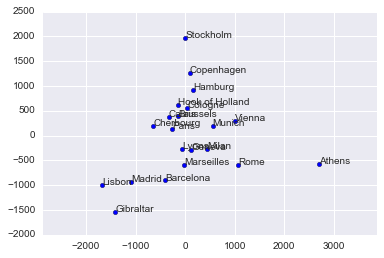

In [46]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
Xr = np.dot(X, rot)
# flip x
Xr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])

for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')

### Selection of the number of components

Thus, we choose to retain information accounted
for by the first three components, since we in the explained variance curve

We must choose $K^* \in [1, \ldots,  K]$ the number of required components ploting the stress obtained using the $k \leq N-1$ components. Generally use $1, \ldots K \leq 4$. Then chose $K^*$ such that you can clearly distinguish an *elbow* in the stress curve. 

[48644495.285714284, 3356497.3657523864, 2858455.4958879622, 2756310.6376280114]


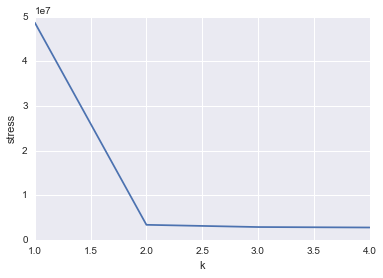

In [47]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k,
           random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]

print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

### Exercices

Apply your sklearn MDS on `iris` dataset available at: 

'https://raw.github.com/neurospin/pystatsml/master/data/iris.csv'

- Center and scale the dataset.

- Compute Euclidean pairwise distances matrix.

- Select the number of components.

- Show that MDS on Euclidean pairwise distances matrix is equivalent to PCA.

## Nonlinear dimensionality reduction

Sources:

- [Scikit-learn documentation](http://scikit-learn.org/stable/modules/manifold.html)

- [Wikipedia](https://en.wikipedia.org/wiki/Isomap)

Nonlinear dimensionality reduction or **manifold learning**  cover unsurpervised methods that attempt to identify low-dimensional manifolds within the original $P$-dimensional space that represent high data density. Then those methods provide a mapping from the high-dimensional space to the low-dimensional embedding.


### Isomap 

Isomap is a nonlinear dimensionality reduction method that combines a procedure to compute the distance matrix with MDS. The distances calculation is based on geodesic distances evaluated on neighborhood graph:

1. Determine the neighbors of each point. All points in some fixed radius or K nearest neighbors.

2. Construct a neighborhood graph. Each point is connected to other if it is a K nearest neighbor. Edge length equal to Euclidean distance.

3. Compute shortest path between pairwise of points $d_{ij}$ to build the distance matrix $\mathbf{D}$. 

4. MDS on  $\mathbf{D}$.

(-5.2720286702613786,
 5.4121544436436198,
 -1.2868871599022034,
 1.23077086457633)

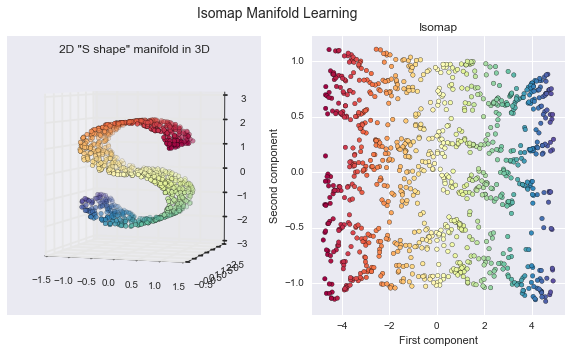

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.samples_generator.make_s_curve(1000, random_state=42)

fig = plt.figure(figsize=(10, 5))
plt.suptitle("Isomap Manifold Learning", fontsize=14)

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')

Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')